### 1.Load the data into the pandas environment and identify some basic details of the dataset.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('employee.csv')
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [3]:
df.shape

(9, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [6]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [7]:
df.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

### 2.Reset the index as "name".

In [73]:
df.set_index('name',inplace=True)

In [17]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3. Select rows for specific names Jack Morgan and Josh wills.

In [20]:
df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [27]:
df1 = df[(df.department=='Sales') | (df.department=='Finance') ]
df1

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score

In [30]:
df2 = df[(df.performance_score >700)]
df2

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6. Display employee who has more than 500 and less than 700 performance score


In [31]:
df3 = df[(df.performance_score >500) & (df.performance_score <700)]
df3

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### 7. Check and handle missing values in the dataset.

In [74]:
df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

Missing values are present in the features Age,income and gender

In [35]:
df.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

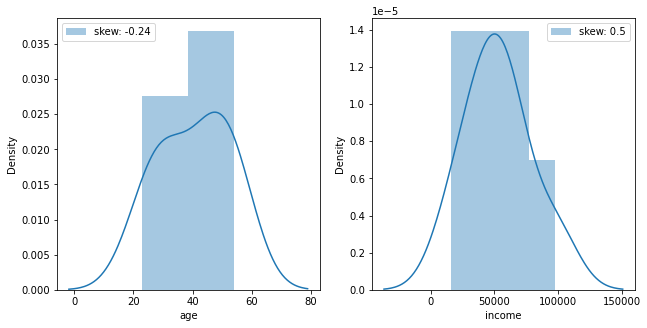

In [75]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.distplot(df['age'],label='skew: '+ str(np.round(df['age'].skew(),2)))
plt.legend()
plt.subplot(132)
sns.distplot(df['income'],label='skew: '+ str(np.round(df['income'].skew(),2)))
plt.legend()
plt.show()

As per the plots and skewness, the skewness is falls in between -0.24 and 0.5 respectively for age and income, this can be assumed as nearly symmetrical. So we can use either mode or median to fill the missing value

In [76]:
for i in ['age','income']:
    df[i] = df[i].fillna(df[i].mean())

In [77]:
#rechecking for the null values
df.isnull().sum()

age                  0
income               0
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [81]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,NaN,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711
Satyam Sharma,40.428571,62000.000000,NaN,Sales,G3,649
James Authur,54.000000,52857.142857,F,Operations,G3,53
Josh Wills,54.000000,52000.000000,F,Finance,G3,901
Leo Duck,23.000000,98000.000000,M,Sales,G4,709


In [82]:
#Handling the null values in gender
#since the null value is  a categorical feature, and only 2 records having the nulls, we can assume the gender from the name
#Assuming both null values are Males
df=df.fillna({'gender':'M'},limit=2)


In [83]:
df.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

### 8. Check the outliers and handle outliers in performance score using Percentiles.

In [86]:
df.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

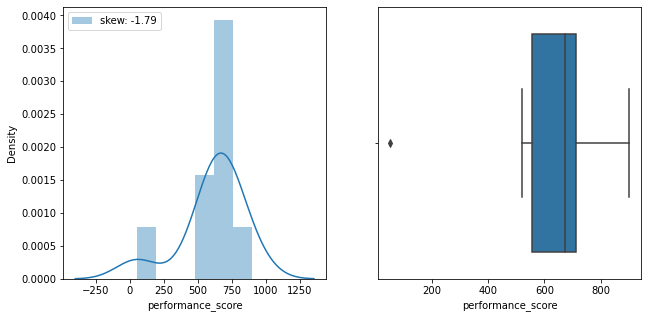

In [93]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.distplot(df['performance_score'],label='skew: '+ str(np.round(df['performance_score'].skew(),2)))
plt.legend()
plt.subplot(132)
sns.boxplot(x=df['performance_score'],data=df)
plt.show()

its clear from the graphs that this feturs is negatively skewed and has got outliers in it

In [94]:
Q1=np.percentile(df['performance_score'],25)
Q2=np.percentile(df['performance_score'],50)
Q3=np.percentile(df['performance_score'],75)

IQR = Q3-Q1

UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

print('Lower limit is :',LL)
print('Upper limit is :',UL)

Lower limit is : 323.5
Upper limit is : 943.5


In [96]:
outlier = []
for i in df['performance_score']:
    if ((i>UL) | (i<LL)):
        outlier.append(i)

In [104]:
ind = df['performance_score'] < LL
df.drop(df.loc[ind].index,inplace=True)

In [107]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,M,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711
Satyam Sharma,40.428571,62000.000000,M,Sales,G3,649
Josh Wills,54.000000,52000.000000,F,Finance,G3,901
Leo Duck,23.000000,98000.000000,M,Sales,G4,709


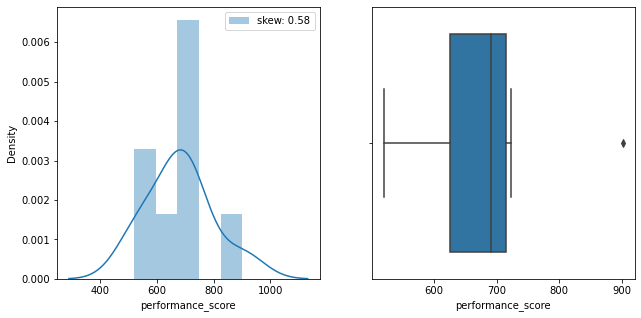

In [108]:
#replotting the graph again after handling outliers
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.distplot(df['performance_score'],label='skew: '+ str(np.round(df['performance_score'].skew(),2)))
plt.legend()
plt.subplot(132)
sns.boxplot(x=df['performance_score'],data=df)
plt.show()

### 9. Check the gender column and do Dummy encoding.

In [112]:
df_enc = pd.get_dummies(df['gender'],drop_first=True)

In [115]:
df_new = pd.concat([df,df_enc],axis=1)

In [119]:
df_new.drop('gender',axis=1,inplace=True)

In [120]:
df_new

,age,income,department,grade,performance_score,M
name,,,,,,
Allen Smith,45.000000,52857.142857,Operations,G3,723,1
S Kumar,40.428571,16000.000000,Finance,G0,520,0
Jack Morgan,32.000000,35000.000000,Finance,G2,674,1
Ying Chin,45.000000,65000.000000,Sales,G3,556,0
Dheeraj Patel,30.000000,42000.000000,Operations,G2,711,0
Satyam Sharma,40.428571,62000.000000,Sales,G3,649,1
Josh Wills,54.000000,52000.000000,Finance,G3,901,0
Leo Duck,23.000000,98000.000000,Sales,G4,709,1


### 10. Do the standard scaling on the feature performance score

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_new['performance_score'] = sc.fit_transform(df_new[['performance_score']])


In [142]:
df_new['age'] = df_new['age'].round(1)

In [143]:
df_new

,age,income,department,grade,performance_score,M
name,,,,,,
Allen Smith,45.0,52857.142857,Operations,G3,0.392262,1
S Kumar,40.4,16000.000000,Finance,G0,-1.475872,0
Jack Morgan,32.0,35000.000000,Finance,G2,-0.058667,1
Ying Chin,45.0,65000.000000,Sales,G3,-1.144578,0
Dheeraj Patel,30.0,42000.000000,Operations,G2,0.281831,0
Satyam Sharma,40.4,62000.000000,Sales,G3,-0.288733,1
Josh Wills,54.0,52000.000000,Finance,G3,2.030331,0
Leo Duck,23.0,98000.000000,Sales,G4,0.263425,1
